In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
from matplotlib import pyplot as plt

In [3]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_ID = train['Id']
test_ID = test['Id']

In [5]:
train['TotalBsmtSF']

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

In [6]:
test['TotalBsmtSF']

0        882.0
1       1329.0
2        928.0
3        926.0
4       1280.0
         ...  
1454     546.0
1455     546.0
1456    1224.0
1457     912.0
1458     996.0
Name: TotalBsmtSF, Length: 1459, dtype: float64

In [7]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [8]:
#Data Processing

In [9]:
##Outliers

In [10]:
# feature engineering

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
df_train = pd.concat((train, test)).reset_index(drop=True)
df_train.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(df_train.shape))





all_data size is : (2919, 79)


In [12]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


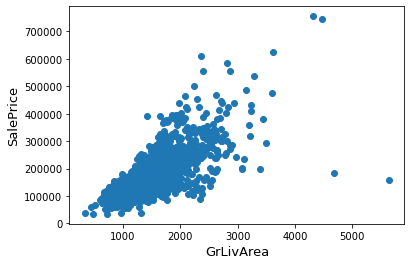

In [13]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

***Removing outliers***

In [14]:
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)

In [15]:
import seaborn as sns

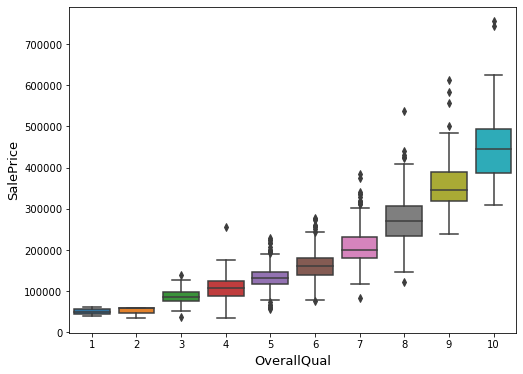

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(train['OverallQual'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

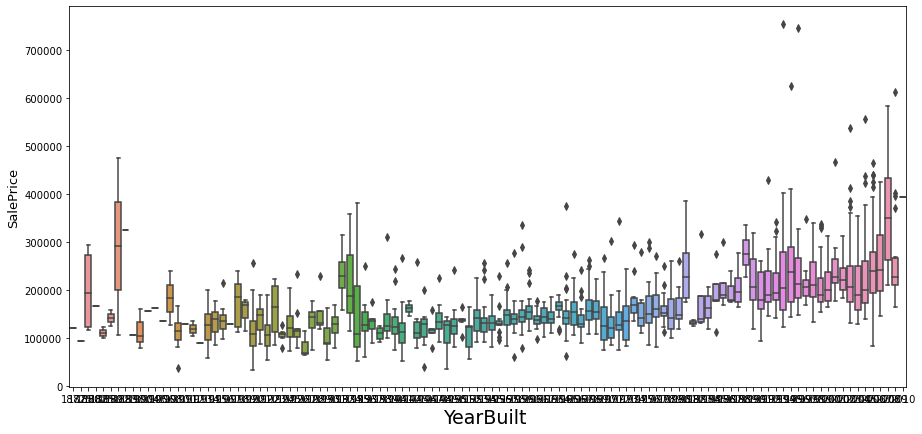

In [17]:
f, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(train['YearBuilt'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt ', fontsize=19)
plt.show()

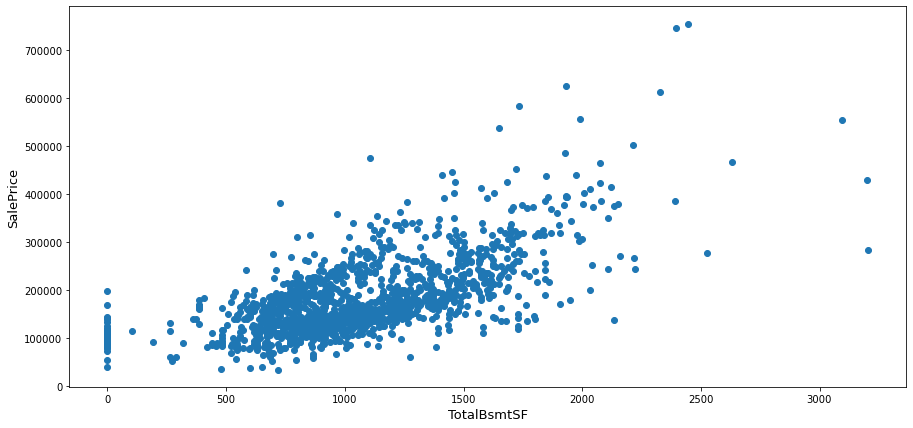

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

 ***Removing outliers***

In [19]:
train.drop(train[(train['TotalBsmtSF']>5700)].index, inplace=True)

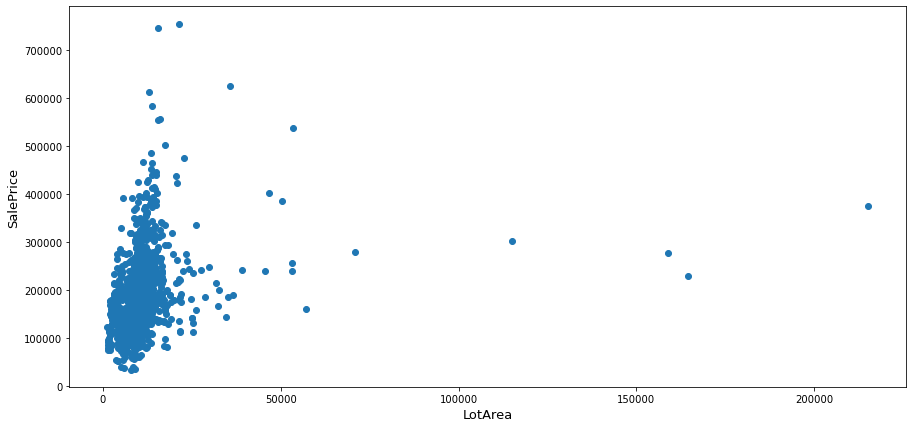

In [20]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(train['LotArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

***Removing outliers***

In [21]:
train.drop(train[(train['LotArea']>150000)].index, inplace=True)

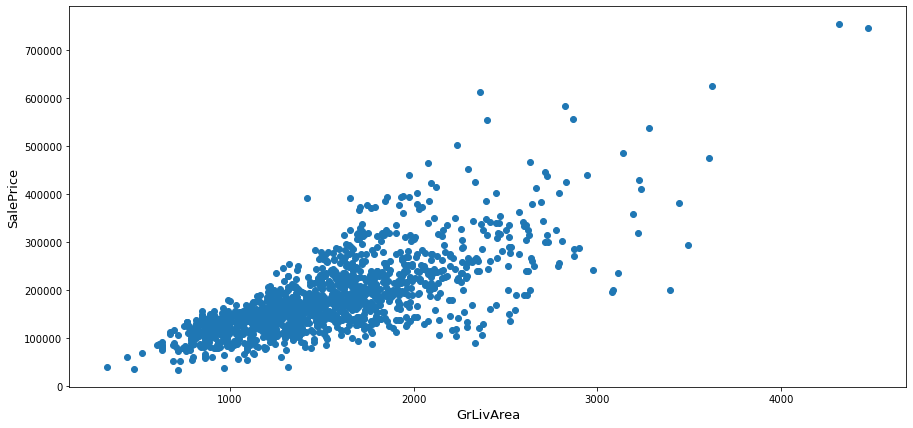

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

***Removing outliers***

In [23]:
train.drop(train[(train['GrLivArea']>5700)].index, inplace=True)


 mu = 180700.51 and sigma = 79336.53



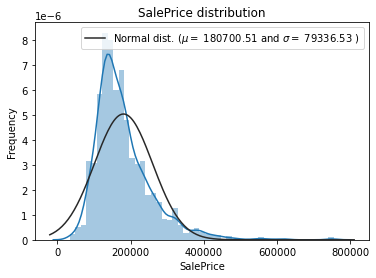

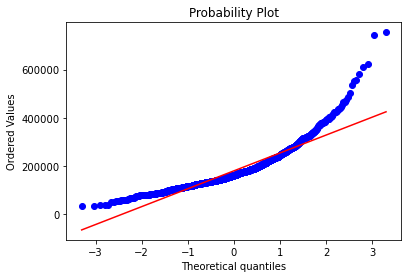


 mu = 12.02 and sigma = 0.40



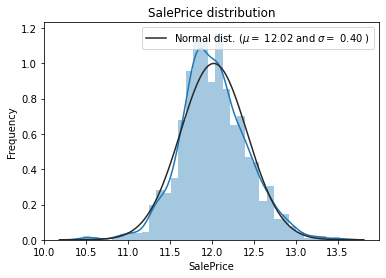

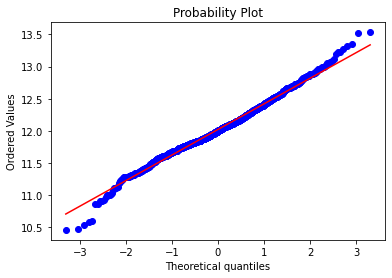

In [24]:
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import norm
from scipy import stats
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# right screwed
# log transformation of target variable
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column

train['SalePrice']=np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


In [25]:
# y_train = train.SalePrice
# df_train = train.drop(columns='SalePrice')

# print("Numeric Data Columns :",+len(df_train._get_numeric_data().columns))
# print("Object Data columns :",+len(df_train.select_dtypes(include='object').columns))



In [26]:
miss=df_train.isnull().sum()
miss=miss[miss>0].sort_values(ascending = False) 

In [27]:
miss

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

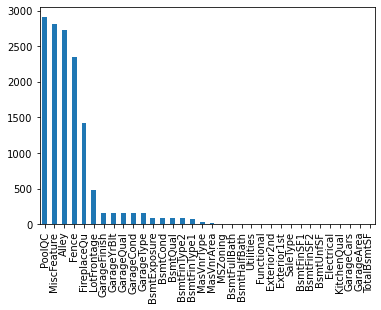

In [28]:
miss.plot.bar()

Text(0.5, 1.0, 'Percent missing data by feature')

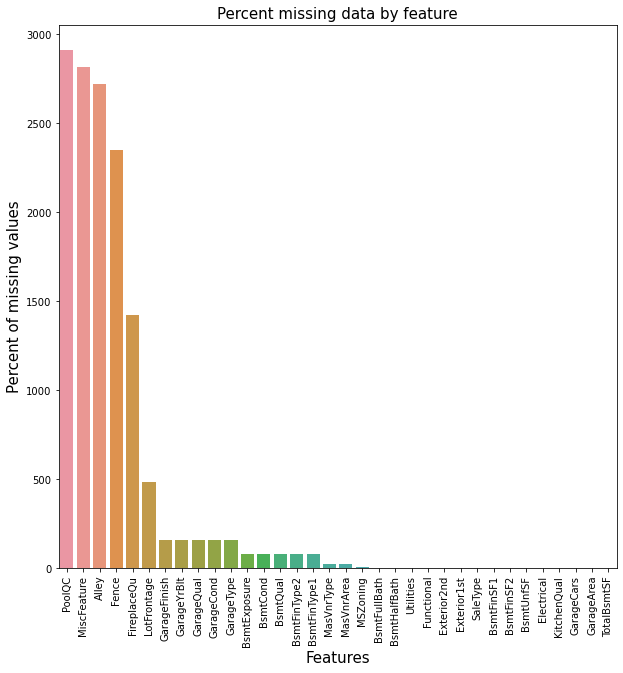

In [29]:
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.barplot(x=miss.index, y=miss)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

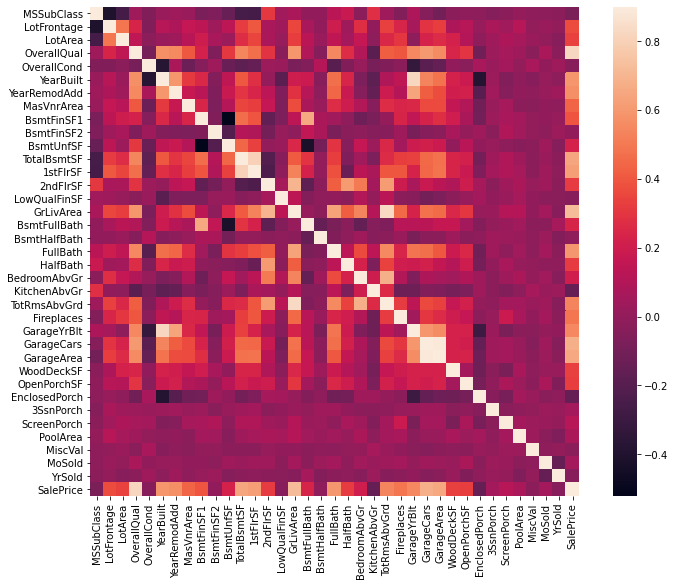

In [30]:
# data correlation
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


In [31]:
def desc(df):
    summary=pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary=summary.reset_index()
    summary['Name']=summary['index']
    summary=summary[['Name','dtypes']]
    summary['Missing']=df.isnull().sum().values
    summary['Unique']=df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [32]:
desc(df_train)

,Name,dtypes,Missing,Unique,First Value,Second Value,Third Value
0,MSSubClass,int64,0,16,60,20,60
1,MSZoning,object,4,5,RL,RL,RL
2,LotFrontage,float64,486,128,65,80,68
3,LotArea,int64,0,1951,8450,9600,11250
4,Street,object,0,2,Pave,Pave,Pave
...,...,...,...,...,...,...,...
74,MiscVal,int64,0,38,0,0,0
75,MoSold,int64,0,12,2,5,9
76,YrSold,int64,0,5,2008,2007,2008
77,SaleType,object,1,9,WD,WD,WD


In [33]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [34]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


(-0.5, 9.5, 0.0, 800000.0)

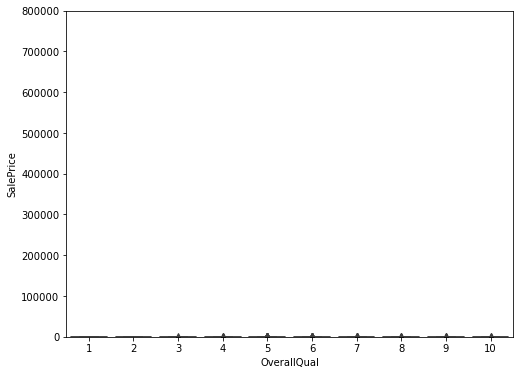

In [35]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

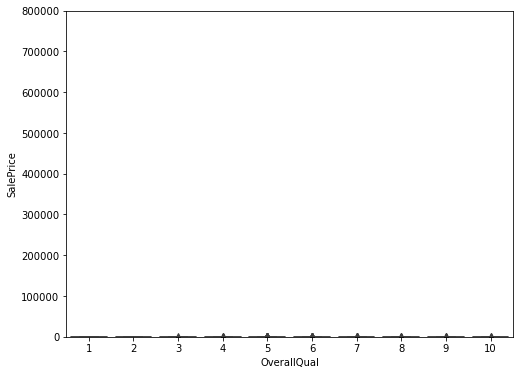

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['OverallQual'], y=train["SalePrice"], data=train)
fig.axis(ymin=0, ymax=800000);

In [37]:
miss1=df_train.isnull().sum()/len(df_train)

In [38]:
miss2=miss1[miss1>0]

In [39]:
miss2.sort_values(ascending = False)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageFinish    0.054471
GarageYrBlt     0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageCars      0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343
dtype: float64

In [40]:
###Imputing missing values 

In [41]:
#  since pool qc means = many no of the house has no feature pool inbuilt so this many values are missing so use none to replace

In [42]:
df_train["PoolQC"]=df_train["PoolQC"].fillna("None")

In [43]:
# misc missing value due to no misc feature available

In [44]:
df_train["MiscFeature"]=df_train["MiscFeature"].fillna("None")

In [45]:
# no fence 
df_train["Fence"]=df_train["Fence"].fillna("None")

In [46]:
# Alley -no alley access
df_train["Alley"]=df_train["Alley"].fillna("None")

In [47]:
# no fireplace quaity=no fireplace
df_train["FireplaceQu"]=df_train["FireplaceQu"].fillna("None")



In [48]:
# LotFrontage: Linear feet of street connected to property
# Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
df_train["LotFrontage"]=df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [49]:
# GarageCond: Garage condition no garrage

In [50]:
miss1=df_train.isnull().sum()/len(df_train)

miss2=miss1[miss1>0]

miss2.sort_values(ascending = False)

GarageQual      0.054471
GarageFinish    0.054471
GarageYrBlt     0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Functional      0.000685
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
SaleType        0.000343
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageCars      0.000343
GarageArea      0.000343
BsmtUnfSF       0.000343
dtype: float64

In [51]:
# GarageType, GarageFinish, GarageQual and GarageCond : None feature mean no value
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

In [52]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

In [53]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna(0)

In [54]:
# 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

In [55]:
# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

In [56]:
miss1=df_train.isnull().sum()/len(df_train)

miss2=miss1[miss1>0]

miss2.sort_values(ascending = False)

MSZoning       0.001370
Functional     0.000685
Utilities      0.000685
SaleType       0.000343
KitchenQual    0.000343
Electrical     0.000343
Exterior2nd    0.000343
Exterior1st    0.000343
dtype: float64

In [57]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [58]:
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

In [59]:
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

In [60]:
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

In [61]:
"""
Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . 
Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling.
We can then safely remove it.
"""

'\nUtilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . \nSince the house with \'NoSewa\' is in the training set, this feature won\'t help in predictive modelling.\nWe can then safely remove it.\n'

In [62]:
df_train = df_train.drop(['Utilities'], axis=1)

In [63]:
miss1=df_train.isnull().sum()/len(df_train)

miss2=miss1[miss1>0]

miss2.sort_values(ascending = False)

Functional     0.000685
KitchenQual    0.000343
dtype: float64

In [64]:
print(df_train['MSSubClass'])

0        60
1        20
2        60
3        70
4        60
       ... 
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: int64


In [65]:
miss1=df_train.isnull().sum()/len(df_train)

miss2=miss1[miss1>0]

miss2.sort_values(ascending = False)

Functional     0.000685
KitchenQual    0.000343
dtype: float64

In [66]:
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

In [67]:
df_train["Functional"] = df_train["Functional"].fillna("Typ")

In [68]:
miss1=df_train.isnull().sum()/len(df_train)

miss2=miss1[miss1>0]

miss2.sort_values(ascending = False)

Series([], dtype: float64)

In [69]:
df_train['TotalBsmtSF']

0        856.0
1       1262.0
2        920.0
3        756.0
4       1145.0
         ...  
2914     546.0
2915     546.0
2916    1224.0
2917     912.0
2918     996.0
Name: TotalBsmtSF, Length: 2919, dtype: float64

In [70]:
# Transforming  numerical variable that are categorical variable

df_train['MSSubClass']=df_train['MSSubClass'].apply(str)

print((df_train['MSSubClass']))

df_train.head()

df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

0        60
1        20
2        60
3        70
4        60
       ... 
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: object


In [71]:
# Label Encoding some categorical variables that may contain information in their ordering set


In [72]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))

# shape        
print('Shape all_data: {}'.format(df_train.shape))

Shape all_data: (2919, 78)


In [73]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,4,2,WD,Normal
1,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,0,3,4,None,0,7,1,WD,Normal
2,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,0,3,4,None,0,11,2,WD,Normal
3,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,0,3,4,None,0,4,0,WD,Abnorml
4,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,0,3,4,None,0,3,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2,RM,21.0,1936,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,8,0,WD,Normal
2915,2,RM,21.0,1894,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,6,0,WD,Abnorml
2916,5,RL,160.0,20000,1,1,3,Lvl,Inside,0,...,0,0,3,4,None,0,11,0,WD,Abnorml
2917,14,RL,62.0,10441,1,1,3,Lvl,Inside,0,...,0,0,3,2,Shed,700,9,0,WD,Normal


In [74]:
print('Shape all_data: {}'.format(df_train.shape))

Shape all_data: (2919, 78)


In [75]:
df_train['TotalSF'] = (df_train['TotalBsmtSF']) + df_train['1stFlrSF'] + df_train['2ndFlrSF']

In [76]:
df_train['TotalSF']

0       2566.0
1       2524.0
2       2706.0
3       2473.0
4       3343.0
         ...  
2914    1638.0
2915    1638.0
2916    2448.0
2917    1882.0
2918    2996.0
Name: TotalSF, Length: 2919, dtype: float64

In [77]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,3,4,None,0,4,2,WD,Normal,2566.0
1,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,3,4,None,0,7,1,WD,Normal,2524.0
2,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,3,4,None,0,11,2,WD,Normal,2706.0
3,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,3,4,None,0,4,0,WD,Abnorml,2473.0
4,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,3,4,None,0,3,2,WD,Normal,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2,RM,21.0,1936,1,1,3,Lvl,Inside,0,...,0,3,4,None,0,8,0,WD,Normal,1638.0
2915,2,RM,21.0,1894,1,1,3,Lvl,Inside,0,...,0,3,4,None,0,6,0,WD,Abnorml,1638.0
2916,5,RL,160.0,20000,1,1,3,Lvl,Inside,0,...,0,3,4,None,0,11,0,WD,Abnorml,2448.0
2917,14,RL,62.0,10441,1,1,3,Lvl,Inside,0,...,0,3,2,Shed,700,9,0,WD,Normal,1882.0


In [78]:

from scipy import stats
from scipy.stats import norm, skew 
#Skewed features
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [79]:
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF'],
      dtype='object')

In [80]:
print(ntrain)

1460


In [81]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [82]:
df_train.shape

(2919, 79)

In [83]:
# Getting dummy categorical features


In [84]:
all_data = pd.get_dummies(df_train)
print(all_data.shape)

(2919, 221)


In [85]:
all_data

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.000000,2.440268,1.820334,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.000000,2.259674,2.440268,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.000000,2.440268,1.820334,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.000000,2.440268,1.820334,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.000000,2.602594,1.820334,14.182841,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.194318,3.932510,14.081426,0.730463,0.730463,1.540963,0.000000,1.820334,2.259674,14.135652,...,0,0,0,1,0,0,0,0,1,0
2915,1.194318,3.932510,14.013314,0.730463,0.730463,1.540963,0.000000,1.820334,1.820334,14.135652,...,0,0,0,1,1,0,0,0,0,0
2916,2.055642,7.620056,22.782058,0.730463,0.730463,1.540963,0.000000,2.055642,2.259674,14.119786,...,0,0,0,1,1,0,0,0,0,0
2917,3.340760,5.744420,20.046557,0.730463,0.730463,1.540963,0.000000,2.055642,1.820334,14.170316,...,0,0,0,1,0,0,0,0,1,0


In [86]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

In [87]:
"""  LASSO Regression :

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline
"""

"  LASSO Regression :\n\nThis model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline\n"

In [88]:
from sklearn.pipeline import make_pipeline

In [89]:
from sklearn.preprocessing import RobustScaler

In [90]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [91]:
lasso

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=1))])

In [92]:

""" Elastic Net Regression :
again made robust to outliers"""
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))



In [93]:
"""Kernel Ridge Regression :""" 

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)



In [94]:
""" Gradient Boosting Regression :
With huber loss that makes it robust to outliers
"""

' Gradient Boosting Regression :\nWith huber loss that makes it robust to outliers\n'

In [95]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [96]:
#XGBoost 
import xgboost as xgb
import lightgbm as lgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [97]:
model_xgb


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints=None,
             n_estimators=2200, n_jobs=None, nthread=-1, num_parallel_tree=None,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=None, silent=1, subsample=0.5213,
             tree_method=None, validate_parameters=None, verbosity=None)

In [98]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [99]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [100]:
"""
 use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation
"""

'\n use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation\n'

In [101]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [102]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [103]:
#Base models scores¶
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 344364368978.73114, tolerance: 759214014.2531198
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314115901175.0898, tolerance: 728773513.025937
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289139362814.1956, tolerance: 699031751.5199751
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334270992492


Lasso score: 33653.0968 (5159.2740)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312059454271.8011, tolerance: 724930391.3116124
  positive)


In [104]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351505224487.71655, tolerance: 759214014.2531198
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320355716936.1738, tolerance: 728773513.025937
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296700403867.6588, tolerance: 699031751.5199751
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340354667577

ElasticNet score: 33497.1390 (4920.9113)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313922625032.0766, tolerance: 724930391.3116124
  positive)


In [105]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 30924.2003 (6322.3783)



In [106]:


score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Gradient Boosting score: 27243.8070 (5576.2974)



In [107]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[15:04:52] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:05] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:18] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:31] WARNING: ..

In [108]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 26791.8693 (4353.0222)



In [109]:
#Stacking models


In [110]:
# Averaged base models class


In [111]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [112]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X, y)
        return self
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)

In [113]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351505224487.71655, tolerance: 759214014.2531198
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 344364368978.73114, tolerance: 759214014.2531198
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320355716936.1738, tolerance: 728773513.025937
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31411590117

 Averaged base models score: 29515.5318 (5658.6357)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312059454271.8011, tolerance: 724930391.3116124
  positive)


In [114]:
# Less simple Stacking : Adding a Meta-model

In [115]:
# In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.


In [116]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [117]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284294454805.23596, tolerance: 628852322.1855334
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269484758757.4435, tolerance: 592930673.2297534
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269729644583.3315, tolerance: 622318955.9288151
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22143146115

Stacking Averaged models score: 27005.9502 (5837.4944)


In [118]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
# StackedRegressor
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313773555570.0094, tolerance: 724013764.6007947
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338046604526.81793, tolerance: 740459574.5039067
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373166029668.7822, tolerance: 786224914.7680945
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30833312223

15002.719293544433


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in expm1
  after removing the cwd from sys.path.


In [121]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[15:12:06] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


3601.0480777813696


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

13289.712348777472


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
12150.69540387214
